In [1]:
import tensorflow.compat.v1 as tf
from sklearn.metrics import confusion_matrix
import numpy as np
from scipy.io import loadmat
import os
from pywt import wavedec
from functools import reduce
from scipy import signal
from scipy.stats import entropy
from scipy.fft import fft, ifft
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow import keras as K
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50
import scipy
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,cross_validate
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout,Conv1D, LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model, load_model
import matplotlib.pyplot as plt;
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.decomposition import PCA
from tensorflow import keras
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Conv1D,Conv2D,Add
from tensorflow.keras.layers import MaxPool1D, MaxPooling2D
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
import xgboost as xgb
import sklearn.svm as svm 
import sklearn.naive_bayes as naive_bayes
from sklearn.linear_model import LogisticRegression 
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from itertools import cycle

In [2]:
input_data = pd.read_csv("/kaggle/input/time-series-repeat/Final_inputs_4.csv")
output_data = pd.read_csv("/kaggle/input/time-series-data/Final_outputs_4.csv")

In [3]:
input_data

,img1,img2,img3,img4,img5,img6,img7,img8,img9,img10,...,img28,img29,img30,img31,img32,img33,img34,img35,img36,img37
0,-1.239142,1.498891,0.189638,-2.929628,-0.790091,-2.478041,0.988637,2.322696,-1.337394,-0.523618,...,-0.008938,0.574405,-0.458697,-2.031613,-1.328224,-1.239142,1.498891,0.189638,-2.929628,-0.790091
1,-0.473891,-1.775369,2.018271,0.087563,-0.136596,0.963593,0.074364,0.475535,-1.887757,-1.601759,...,-0.062667,-0.473891,-1.775369,2.018271,0.087563,-0.136596,0.963593,0.074364,0.475535,-1.887757
2,2.732457,0.878624,-3.116104,0.704959,2.981228,-0.287656,-0.802391,2.732457,0.878624,-3.116104,...,-0.802391,2.732457,0.878624,-3.116104,0.704959,2.981228,-0.287656,-0.802391,2.732457,0.878624
3,2.574738,-2.062863,3.955059,-3.664877,-6.586027,1.369082,3.764334,3.962135,-1.449717,-8.435167,...,-4.453963,3.819314,-3.347995,1.612793,3.188694,2.574738,-2.062863,3.955059,-3.664877,-6.586027
4,5.398529,-6.506147,-0.266727,1.759737,-5.126099,2.003309,1.808564,-4.672224,-8.855239,0.902672,...,1.159636,5.398529,-6.506147,-0.266727,1.759737,-5.126099,2.003309,1.808564,-4.672224,-8.855239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,-1.856298,3.044136,-1.374764,0.523651,1.256430,3.026562,-6.559871,-1.638449,0.638746,-7.805001,...,2.647095,-1.345841,3.250360,-1.856298,3.044136,-1.374764,0.523651,1.256430,3.026562,-6.559871
10823,6.040045,-1.295440,10.394622,3.305884,1.982401,4.278109,2.383811,6.040045,-1.295440,10.394622,...,2.383811,6.040045,-1.295440,10.394622,3.305884,1.982401,4.278109,2.383811,6.040045,-1.295440
10824,-4.434929,-1.159476,-3.856269,-0.269374,1.879222,-2.862106,4.419580,-1.912875,5.539759,-2.705979,...,0.748480,-4.202143,-3.425234,-4.434929,-1.159476,-3.856269,-0.269374,1.879222,-2.862106,4.419580
10825,-0.956519,1.020237,-2.005922,-2.228816,2.067930,-0.088604,-3.029148,-1.539736,3.780307,-2.550555,...,0.710189,1.523283,-3.632663,-0.956519,1.020237,-2.005922,-2.228816,2.067930,-0.088604,-3.029148


In [4]:
output_data

,label
0,0
1,1
2,2
3,0
4,1
...,...
10822,1
10823,2
10824,0
10825,1


In [5]:
length = len(output_data)

In [6]:
# lst = []
# for i in range(length):
#     if float(output_data['label'][i]) == 1:
#         lst.append(i)

# output_data.drop(output_data.index[lst], inplace = True)
# input_data.drop(input_data.index[lst], inplace = True)

In [7]:
x = input_data.to_numpy()
y = output_data.to_numpy()

In [8]:
# for i in range(len(y)):
#     if y[i] == 1:
#         y[i] = 0
        
# for i in range(len(y)):
#     if y[i] == 2:
#         y[i] = 1

In [9]:
x = StandardScaler().fit_transform(x)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

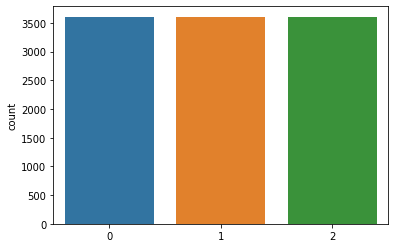

In [10]:
t = []
for i in range(len(y)):
    t.append(y[i][0])
import seaborn as sns 
sns.countplot(t)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [12]:
# pca = PCA(n_components=225)
# train_x_pca = pca.fit_transform(x_train)
# test_x_pca = pca.transform(x_test)
test_x_pca = x_test
train_x_pca = x_train

In [13]:
x_train.shape

(8120, 37)

# ML Models

In [14]:
ly_train = label_binarize(y_train, classes=[0, 1, 2])
ly_test = label_binarize(y_test, classes=[0, 1, 2])

## 1. SVM

In [15]:
clf_pca = SVC(kernel = 'rbf',class_weight = "balanced",decision_function_shape='ovo',C = 1.5, probability = True,gamma = 'scale')
clf_pca.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.5, class_weight='balanced', decision_function_shape='ovo',
    probability=True)

In [16]:
test_yhat = clf_pca.predict_proba(x_test)
# test_yhat

In [17]:
fin_lst = []
for i in test_yhat:
    fin_lst.append(np.argmax(i, axis=0))
    
fin_lst = np.array(fin_lst)
fin_lst = fin_lst.reshape((-1,1))
fin_lst.shape

metrics.precision_score(y_test, fin_lst,average='micro')

0.8112301440709272

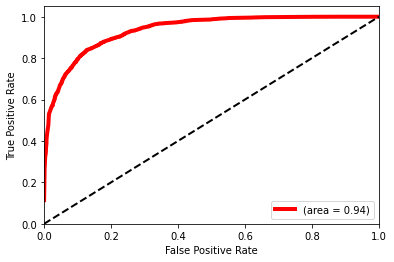

In [18]:
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ly_test[:, i], test_yhat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ly_test.ravel(), test_yhat.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
# plt.plot(
#     fpr["micro"],
#     tpr["micro"],
#     label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
#     color="deeppink",
#     linewidth=4,
# )

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="(area = {0:0.2f})".format(roc_auc["macro"]),
    color="red",
#     linestyle=":",
    linewidth=4,
)

# colors = cycle(["aqua", "darkorange", "cornflowerblue"])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(
#         fpr[i],
#         tpr[i],
#         color=color,
#         lw=2,
#         label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
#     )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [19]:
cv = KFold(n_splits=10, shuffle=True)
# clf_pca = SVC(kernel = 'rbf',class_weight = "balanced",decision_function_shape='ovo',C = 1.5, probability = True,gamma = 'scale')
scores = cross_val_score(clf_pca, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(scores)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

0.8027146985081149

In [20]:
confusion_matrix(y_test, fin_lst)

array([[686, 173,  46],
       [227, 658,  32],
       [ 23,  10, 852]])

In [21]:
print(classification_report(y_test, fin_lst, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       905
           1       0.78      0.72      0.75       917
           2       0.92      0.96      0.94       885

    accuracy                           0.81      2707
   macro avg       0.81      0.81      0.81      2707
weighted avg       0.81      0.81      0.81      2707



In [22]:
roc_auc_score(ly_test, test_yhat, average=None)

array([0.90394497, 0.90885539, 0.99146031])

## 2. XG Boost

In [23]:
xgbc = xgb.XGBClassifier(n_estimators=1000, random_state=0,learning_rate = 0.1,use_label_encoder=False)
xgbc.fit(train_x_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [24]:
test_yhat = xgbc.predict_proba(test_x_pca)
# test_yhat

In [25]:
fin_lst = []
for i in test_yhat:
    fin_lst.append(np.argmax(i, axis=0))
    
fin_lst = np.array(fin_lst)
fin_lst = fin_lst.reshape((-1,1))
fin_lst.shape

metrics.precision_score(y_test, fin_lst,average='micro')

0.828961950498707

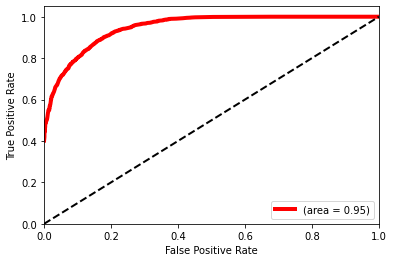

In [26]:
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ly_test[:, i], test_yhat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ly_test.ravel(), test_yhat.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
# plt.plot(
#     fpr["micro"],
#     tpr["micro"],
#     label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
#     color="deeppink",
#     linewidth=4,
# )

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="(area = {0:0.2f})".format(roc_auc["macro"]),
    color="red",
#     linestyle=":",
    linewidth=4,
)

# colors = cycle(["aqua", "darkorange", "cornflowerblue"])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(
#         fpr[i],
#         tpr[i],
#         color=color,
#         lw=2,
#         label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
#     )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [27]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# clf_pca = SVC(kernel = 'rbf',class_weight = "balanced",decision_function_shape='ovo',C = 1.5, probability = True,gamma = 'scale')
scores = cross_val_score(xgbc, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(scores)

0.8363369875218254

In [28]:
confusion_matrix(y_test, fin_lst)

array([[690, 204,  11],
       [225, 677,  15],
       [  3,   5, 877]])

In [29]:
print(classification_report(y_test, fin_lst, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       905
           1       0.76      0.74      0.75       917
           2       0.97      0.99      0.98       885

    accuracy                           0.83      2707
   macro avg       0.83      0.83      0.83      2707
weighted avg       0.83      0.83      0.83      2707



In [30]:
roc_auc_score(ly_test, test_yhat, average=None)

array([0.91965772, 0.92087387, 0.99932712])

## 3. AdaBoost

In [31]:
clf1 = AdaBoostClassifier(n_estimators=1000, random_state=0,learning_rate = 0.1)
clf1.fit(train_x_pca, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(learning_rate=0.1, n_estimators=1000, random_state=0)

In [32]:
test_yhat = clf1.predict_proba(test_x_pca)
# test_yhat

In [33]:
fin_lst = []
for i in test_yhat:
    fin_lst.append(np.argmax(i, axis=0))
    
fin_lst = np.array(fin_lst)
fin_lst = fin_lst.reshape((-1,1))
fin_lst.shape

metrics.precision_score(y_test, fin_lst,average='micro')

0.4525304765422977

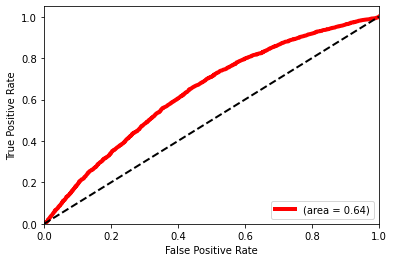

In [34]:
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ly_test[:, i], test_yhat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ly_test.ravel(), test_yhat.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
# plt.plot(
#     fpr["micro"],
#     tpr["micro"],
#     label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
#     color="deeppink",
#     linewidth=4,
# )

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="(area = {0:0.2f})".format(roc_auc["macro"]),
    color="red",
#     linestyle=":",
    linewidth=4,
)

# colors = cycle(["aqua", "darkorange", "cornflowerblue"])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(
#         fpr[i],
#         tpr[i],
#         color=color,
#         lw=2,
#         label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
#     )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [35]:
cv = KFold(n_splits=4, random_state=1, shuffle=True)
# clf_pca = SVC(kernel = 'rbf',class_weight = "balanced",decision_function_shape='ovo',C = 1.5, probability = True,gamma = 'scale')
scores = cross_val_score(clf1, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(scores)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a 

0.4404732700062333

In [36]:
confusion_matrix(y_test, fin_lst)

array([[491, 183, 231],
       [268, 343, 306],
       [248, 246, 391]])

In [37]:
print(classification_report(y_test, fin_lst, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.49      0.54      0.51       905
           1       0.44      0.37      0.41       917
           2       0.42      0.44      0.43       885

    accuracy                           0.45      2707
   macro avg       0.45      0.45      0.45      2707
weighted avg       0.45      0.45      0.45      2707



In [38]:
roc_auc_score(ly_test, test_yhat, average=None)

array([0.67645955, 0.61373193, 0.62438991])

# Neural Networks

In [15]:
x_train = np.array(x_train).reshape(-1,37,1)
x_test = np.array(x_test).reshape(-1,37,1)

In [16]:
inputs = tf.keras.Input(shape=(37,1))

Dense1 = Dense(32, activation = 'relu',kernel_regularizer=keras.regularizers.l2())(inputs)

lstm_1=  Bidirectional(LSTM(64, return_sequences = True))(Dense1)
drop = Dropout(0.5)(lstm_1)
lstm_2=  Bidirectional(LSTM(32, return_sequences = True))(drop)
drop2 = Dropout(0.5)(lstm_2)

flat = Flatten()(drop2)

Dense_2 = Dense(64, activation = 'relu')(flat)
Dense_3 = Dense(32, activation = 'relu')(Dense_2)
outputs = Dense(3, activation='sigmoid')(Dense_3)

model = tf.keras.Model(inputs, outputs)

model.summary()

2023-02-13 15:35:23.541821: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-13 15:35:23.679123: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-13 15:35:23.680027: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-13 15:35:23.681795: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 37, 1)]           0         
_________________________________________________________________
dense (Dense)                (None, 37, 32)            64        
_________________________________________________________________
bidirectional (Bidirectional (None, 37, 128)           49664     
_________________________________________________________________
dropout (Dropout)            (None, 37, 128)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 37, 64)            41216     
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 2368)              0     

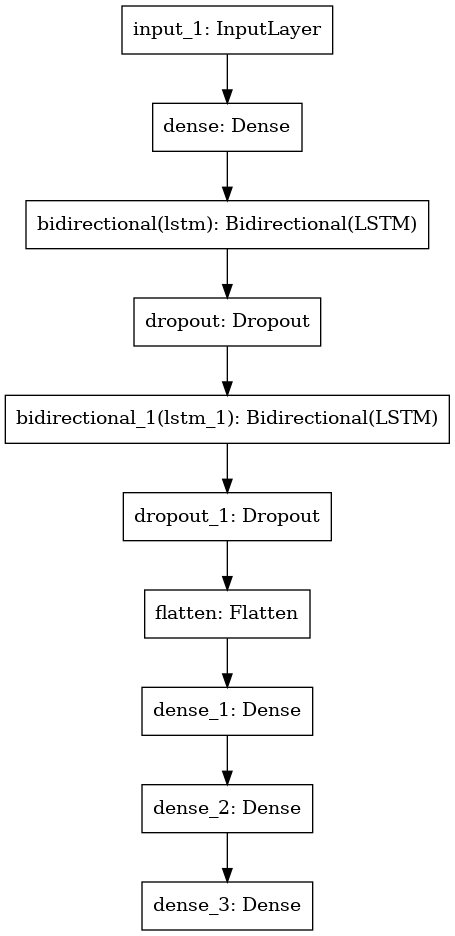

In [17]:
tf.keras.utils.plot_model(model)

In [18]:
def train_model(model,x_train, y_train,x_test,y_test, save_to, epoch = 2):

        opt_adam = keras.optimizers.Adam(learning_rate=0.001)

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
        mc = ModelCheckpoint(save_to + '_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
        lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
        
        model.compile(optimizer=opt_adam,
                  loss=['binary_crossentropy'],
                  metrics=['accuracy'])
        
        history = model.fit(x_train,y_train,
                        batch_size=20,
                        epochs=epoch,
                        validation_data=(x_test,y_test),
                        callbacks=[es,mc,lr_schedule])
        
        saved_model = load_model(save_to + '_best_model.h5')
        
        return model,history

In [19]:
model,history = train_model(model, x_train, ly_train,x_test,ly_test, save_to= './', epoch = 100) 

2023-02-13 15:35:31.249993: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2023-02-13 15:35:37.369882: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


406/406 [==============================] - 13s 15ms/step - loss: 0.6245 - accuracy: 0.4158 - val_loss: 0.6142 - val_accuracy: 0.4363

Epoch 00001: val_accuracy improved from -inf to 0.43628, saving model to ./_best_model.h5
Epoch 2/100
406/406 [==============================] - 4s 11ms/step - loss: 0.4809 - accuracy: 0.5867 - val_loss: 0.3417 - val_accuracy: 0.6897

Epoch 00002: val_accuracy improved from 0.43628 to 0.68969, saving model to ./_best_model.h5
Epoch 3/100
406/406 [==============================] - 5s 11ms/step - loss: 0.3337 - accuracy: 0.7252 - val_loss: 0.2986 - val_accuracy: 0.7680

Epoch 00003: val_accuracy improved from 0.68969 to 0.76801, saving model to ./_best_model.h5
Epoch 4/100
406/406 [==============================] - 5s 13ms/step - loss: 0.3086 - accuracy: 0.7538 - val_loss: 0.2986 - val_accuracy: 0.7695

Epoch 00004: val_accuracy improved from 0.76801 to 0.76949, saving model to ./_best_model.h5
Epoch 5/100
302/406 [=====================>........] - ETA: 1s

KeyboardInterrupt: 

In [44]:
model = load_model('./_best_model.h5')

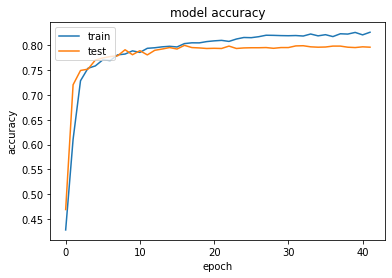

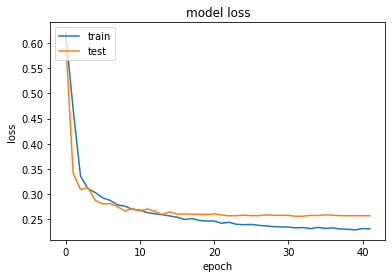

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
y_pred = model.predict(x_test)

In [47]:
fin_lst = []
for i in y_pred:
    fin_lst.append(np.argmax(i, axis=0))
    
fin_lst = np.array(fin_lst)
fin_lst = fin_lst.reshape((-1,1))
fin_lst.shape

metrics.precision_score(y_test, fin_lst,average='micro')

0.8001477650535649

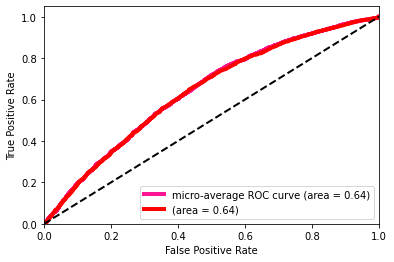

In [48]:
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ly_test[:, i], test_yhat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ly_test.ravel(), test_yhat.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="(area = {0:0.2f})".format(roc_auc["macro"]),
    color="red",
#     linestyle=":",
    linewidth=4,
)

# colors = cycle(["aqua", "darkorange", "cornflowerblue"])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(
#         fpr[i],
#         tpr[i],
#         color=color,
#         lw=2,
#         label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
#     )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [49]:
confusion_matrix(y_test, fin_lst)

array([[649, 246,  10],
       [280, 632,   5],
       [  0,   0, 885]])

In [50]:
roc_auc_score(ly_test, y_pred, average=None)

array([0.88815865, 0.89138739, 0.99957457])

In [51]:
print(classification_report(y_test, fin_lst, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       905
           1       0.72      0.69      0.70       917
           2       0.98      1.00      0.99       885

    accuracy                           0.80      2707
   macro avg       0.80      0.80      0.80      2707
weighted avg       0.80      0.80      0.80      2707



## LSTM

In [52]:
inputs = tf.keras.Input(shape=(37,1))

Dense1 = Dense(32, activation = 'relu',kernel_regularizer=keras.regularizers.l2())(inputs)

lstm_1=  LSTM(64, return_sequences = True)(Dense1)
drop = Dropout(0.5)(lstm_1)
lstm_2=  LSTM(32, return_sequences = True)(drop)
drop2 = Dropout(0.5)(lstm_2)

flat = Flatten()(drop2)

Dense_2 = Dense(64, activation = 'relu')(flat)
Dense_3 = Dense(32, activation = 'relu')(Dense_2)
outputs = Dense(3, activation='sigmoid')(Dense_3)

model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 37, 1)]           0         
_________________________________________________________________
dense_4 (Dense)              (None, 37, 32)            64        
_________________________________________________________________
lstm_2 (LSTM)                (None, 37, 64)            24832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 37, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 37, 32)            12416     
_________________________________________________________________
dropout_3 (Dropout)          (None, 37, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1184)              0   

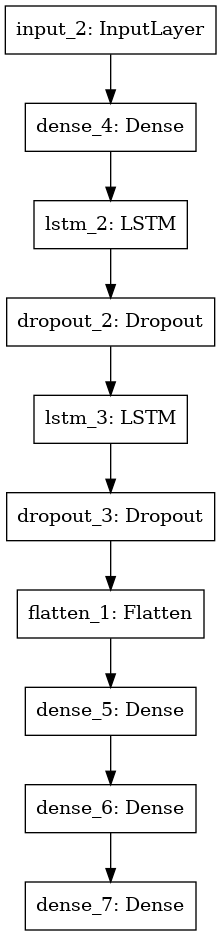

In [53]:
tf.keras.utils.plot_model(model)

In [54]:
def train_model(model,x_train, y_train,x_test,y_test, save_to, epoch = 2):

        opt_adam = keras.optimizers.Adam(learning_rate=0.001)

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
        mc = ModelCheckpoint(save_to + '_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
        lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
        
        model.compile(optimizer=opt_adam,
                  loss=['binary_crossentropy'],
                  metrics=['accuracy'])
        
        history = model.fit(x_train,y_train,
                        batch_size=20,
                        epochs=epoch,
                        validation_data=(x_test,y_test),
                        callbacks=[es,mc,lr_schedule])
        
        saved_model = load_model(save_to + '_best_model.h5')
        
        return model,history

In [55]:
model,history = train_model(model, x_train, ly_train,x_test,ly_test, save_to= './', epoch = 100) 

Epoch 1/100
406/406 [==============================] - 6s 9ms/step - loss: 0.6258 - accuracy: 0.4044 - val_loss: 0.6071 - val_accuracy: 0.4463

Epoch 00001: val_accuracy improved from -inf to 0.44625, saving model to ./_best_model.h5
Epoch 2/100
406/406 [==============================] - 3s 7ms/step - loss: 0.4486 - accuracy: 0.6188 - val_loss: 0.3361 - val_accuracy: 0.7422

Epoch 00002: val_accuracy improved from 0.44625 to 0.74215, saving model to ./_best_model.h5
Epoch 3/100
406/406 [==============================] - 3s 7ms/step - loss: 0.3281 - accuracy: 0.7272 - val_loss: 0.3224 - val_accuracy: 0.7510

Epoch 00003: val_accuracy improved from 0.74215 to 0.75102, saving model to ./_best_model.h5
Epoch 4/100
406/406 [==============================] - 3s 7ms/step - loss: 0.3130 - accuracy: 0.7467 - val_loss: 0.3023 - val_accuracy: 0.7588

Epoch 00004: val_accuracy improved from 0.75102 to 0.75877, saving model to ./_best_model.h5
Epoch 5/100
406/406 [==============================] - 

In [56]:
model = load_model('./_best_model.h5')

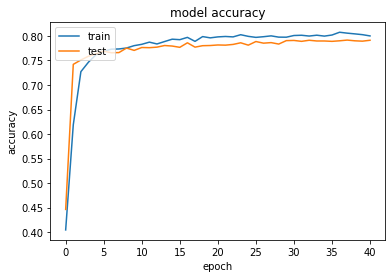

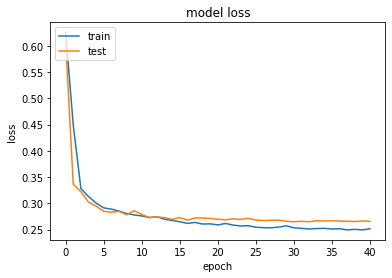

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:
y_pred = model.predict(x_test)

In [59]:
fin_lst = []
for i in y_pred:
    fin_lst.append(np.argmax(i, axis=0))
    
fin_lst = np.array(fin_lst)
fin_lst = fin_lst.reshape((-1,1))
fin_lst.shape

metrics.precision_score(y_test, fin_lst,average='micro')

0.791651274473587

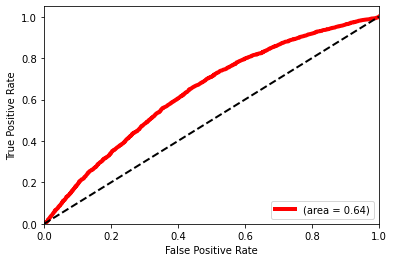

In [60]:
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ly_test[:, i], test_yhat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ly_test.ravel(), test_yhat.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
# plt.plot(
#     fpr["micro"],
#     tpr["micro"],
#     label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
#     color="deeppink",
#     linewidth=4,
# )

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="(area = {0:0.2f})".format(roc_auc["macro"]),
    color="red",
#     linestyle=":",
    linewidth=4,
)

# colors = cycle(["aqua", "darkorange", "cornflowerblue"])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(
#         fpr[i],
#         tpr[i],
#         color=color,
#         lw=2,
#         label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
#     )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [61]:
confusion_matrix(y_test, fin_lst)

array([[636, 259,  10],
       [290, 622,   5],
       [  0,   0, 885]])

In [62]:
roc_auc_score(ly_test, y_pred, average=None)

array([0.88218861, 0.88428139, 0.99952278])

In [63]:
print(classification_report(y_test, fin_lst, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69       905
           1       0.71      0.68      0.69       917
           2       0.98      1.00      0.99       885

    accuracy                           0.79      2707
   macro avg       0.79      0.79      0.79      2707
weighted avg       0.79      0.79      0.79      2707

